In [114]:
TRAIN_PATH= "./train"
TEST_PATH= "./test"

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.models import Sequential

In [116]:
# #CNN Based Model in Keras 
# model =Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3))) #this a standard size for kernal size

# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(.1))

# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(.1))

# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(.1))

# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(.1))

# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(.1))

# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(.1))

# model.add(Flatten())

# model.add(Dense(256,activation= 'relu'))
# model.add(Dropout(0.1))

# model.add(Dense(128,activation= 'relu'))
# model.add(Dropout(0.1))

# model.add(Dense(64,activation= 'relu'))
# model.add(Dropout(0.1))

# #model.add(Dense(1,activation='sigmoid'))
# model.add(Dense(3, activation='softmax'))

# #model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

# model.summary()

In [117]:

#ANN
model =Sequential()

model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_64 (Dense)             (None, 256)               38535424  
_________________________________________________________________
dense_65 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_66 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_67 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_68 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_69 (Dense)             (None, 128)              

In [118]:
#Train from scratch #image pre prossessing
train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

#test_dataset= image.ImageDataGenerator(rescale=1./255)

In [119]:
#BatchNormalizatoin Train Data
train_generator= train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224,224), #Standard size, not too small, not too big 
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    subset="training",
    
)

Found 480 images belonging to 3 classes.


In [120]:
train_generator.class_indices

{'DMR': 0, 'MD': 1, 'NORMAL': 2}

In [121]:
#BatchNormalizatoin Validation Data
val_generator= train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224,224), 
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    subset="validation",
    
)

Found 120 images belonging to 3 classes.


In [122]:
hist= model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=15,
    validation_data=val_generator,
    validation_steps=1
)

Epoch 1/15
5/5 [==============================] - 13s 3s/step - loss: 7.2208 - accuracy: 0.2750 - val_loss: 3.0939 - val_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 11s 2s/step - loss: 4.9401 - accuracy: 0.3250 - val_loss: 5.9418 - val_accuracy: 0.5625
Epoch 3/15
5/5 [==============================] - 11s 2s/step - loss: 3.6209 - accuracy: 0.4437 - val_loss: 0.9516 - val_accuracy: 0.7188
Epoch 4/15
5/5 [==============================] - 11s 2s/step - loss: 1.7145 - accuracy: 0.3812 - val_loss: 1.4002 - val_accuracy: 0.6250
Epoch 5/15
5/5 [==============================] - 11s 2s/step - loss: 1.3740 - accuracy: 0.5125 - val_loss: 1.0023 - val_accuracy: 0.5625
Epoch 6/15
5/5 [==============================] - 11s 2s/step - loss: 1.0115 - accuracy: 0.5625 - val_loss: 1.2526 - val_accuracy: 0.2188
Epoch 7/15
5/5 [==============================] - 11s 2s/step - loss: 0.9962 - accuracy: 0.5375 - val_loss: 1.0511 - val_accuracy: 0.5625
Epoch 8/15
5/5 [==================

In [123]:
#model.save('my_model.h5')

In [124]:
test_dataset= image.ImageDataGenerator(rescale=1./255)

test_generator= train_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(224,224), 
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb"
)

Found 153 images belonging to 3 classes.


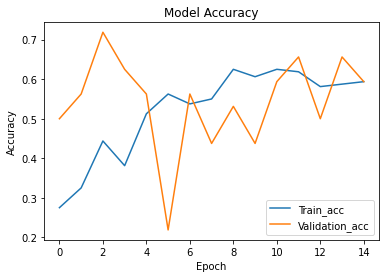

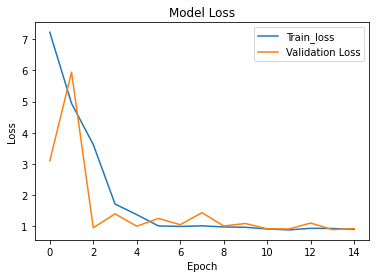

In [125]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

In [126]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

Evaluate on test data
5/5 [==============================] - 8s 2s/step - loss: 0.9589 - accuracy: 0.6078
test loss, test acc: [0.9589241147041321, 0.6078431606292725]
